---

# Lib

In [25]:
from collections import Counter

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import MultiLabelBinarizer

from preprocessing.clean import vn_text_clean
from preprocessing.tokenize import vn_word_tokenize
from preprocessing.remove_stopwords import remove_stopwords

---

# Read file

In [2]:
# Train
df_train = pd.read_csv("../data/raw/train.csv")
df_train.columns = df_train.columns.str.strip().str.lower().str.replace(' ', '_')
# Validation
df_val = pd.read_csv("../data/raw/val.csv")
df_val.columns = df_val.columns.str.strip().str.lower().str.replace(' ', '_')
# Test
df_test = pd.read_csv("../data/raw/test.csv")
df_test.columns = df_test.columns.str.strip().str.lower().str.replace(' ', '_')

In [3]:
df_train = df_train[["comment", "label"]].copy()
df_val = df_val[["comment", "label"]].copy()
df_test = df_test[["comment", "label"]].copy()

In [4]:
print(df_train.shape, df_val.shape, df_test.shape)

(3592, 2) (770, 2) (770, 2)


---

# Clean text

In [5]:
df_train["comment"] = df_train["comment"].apply(lambda x: vn_text_clean(x))
df_val["comment"] = df_val["comment"].apply(lambda x: vn_text_clean(x))
df_test["comment"] = df_test["comment"].apply(lambda x: vn_text_clean(x))

In [6]:
df_train.iloc[0, 0]

'giá nó còn quá cao so với thu nhập người việt hy vọng tương lại hãng giảm xún cho bản thấp là đẹp'

In [7]:
df_val.iloc[0,0]

'chạy ngoài đường thấy chiếc byd đẹp thật'

In [8]:
df_test.iloc[0,0]

'ngoại thất mới nhìn hiện đại hơn hẳn'

---

# Tokenize

In [9]:
df_train["comment"] = df_train["comment"].apply(vn_word_tokenize, method="underthesea")
df_val["comment"] = df_val["comment"].apply(vn_word_tokenize, method="underthesea")
df_test["comment"] = df_test["comment"].apply(vn_word_tokenize, method="underthesea")

In [10]:
df_train.iloc[0, 0]

'giá nó còn quá cao so với thu_nhập người việt hy_vọng tương_lại hãng giảm xún cho bản thấp là đẹp'

In [11]:
df_val.iloc[0, 0]

'chạy ngoài đường thấy chiếc byd đẹp thật'

In [12]:
df_test.iloc[0,0]

'ngoại thất mới nhìn hiện_đại hơn hẳn'

---

# Remove stopwords

In [13]:
# Backup text for remove stopwords
df_train["text_backup"] = df_train["comment"].copy()
df_val["text_backup"] = df_val["comment"].copy()
df_test["text_backup"] = df_test["comment"].copy()

In [14]:
def remove_stopwords_wrapper(df: pd.DataFrame) -> pd.DataFrame:
    # Remove stopwords with fallback if result becomes empty/NaN
    post = df["comment"].apply(remove_stopwords)

    # Normalize empties to NaN to enable fallback
    post = post.replace("", np.nan)

    print(post.isnull().sum())

    # Fallback to backup text where stopword removal produced NaN
    fallback = post.fillna(df["text_backup"])

    df["comment"] = fallback
    
    return df

In [15]:
df_train = remove_stopwords_wrapper(df_train)
df_val = remove_stopwords_wrapper(df_val)
df_test = remove_stopwords_wrapper(df_test)

9
3
1


In [16]:
df_train.iloc[0, 0]

'giá thu_nhập việt hy_vọng tương_lại hãng xún đẹp'

In [17]:
df_val.iloc[0, 0]

'chạy đường byd đẹp'

In [18]:
df_test.iloc[0,0]

'ngoại thất hiện_đại hẳn'

In [19]:
# Remove backup columns
df_train.drop(columns="text_backup", axis=1, inplace=True)
df_val.drop(columns="text_backup", axis=1, inplace=True)
df_test.drop(columns="text_backup", axis=1, inplace=True)

---

# Save file

In [20]:
#df_train.to_csv("../data/processed/train.csv", index=False)
#df_val.to_csv("../data/processed/val.csv", index=False)
#df_test.to_csv("../data/processed/test.csv", index=False)

---

# Perform

In [ ]:
# Merge all datasets
df_all = pd.concat([df_train, df_val, df_test], axis=0, ignore_index=True)
print(f"Total samples: {len(df_all)}")
print(f"Train: {len(df_train)}, Val: {len(df_val)}, Test: {len(df_test)}")

Total samples: 5132
Train: 3592, Val: 770, Test: 770


,comment,label
0,giá thu_nhập việt hy_vọng tương_lại hãng xún đẹp,negative
1,kushaq apple carplay dây kết_nối tiện_lợi chuẩ...,positive
2,mua xe tôn tiền,neutral
3,xe đỉnh chuẩn xe châu_âu giá_cả,positive
4,nline lăn bánh terri trend cx5 deluxe chặn 2 đ...,negative


In [29]:
all_words = []
for comment in df_all["comment"]:
    words = comment.split()
    all_words.extend(words)

print(f"Total words: {len(all_words)}")
print(f"Unique words: {len(set(all_words))}")

# Count word frequencies
word_freq = Counter(all_words)
top_words = word_freq.most_common(30)
print("\nTop 10 words:")
for word, count in top_words[:10]:
    print(f"{word}: {count}")

Total words: 53120
Unique words: 7283

Top 10 words:
xe: 2932
đi: 1022
giá: 905
đẹp: 760
mua: 756
rẻ: 557
chạy: 549
ngon: 364
lái: 360
tiền: 350


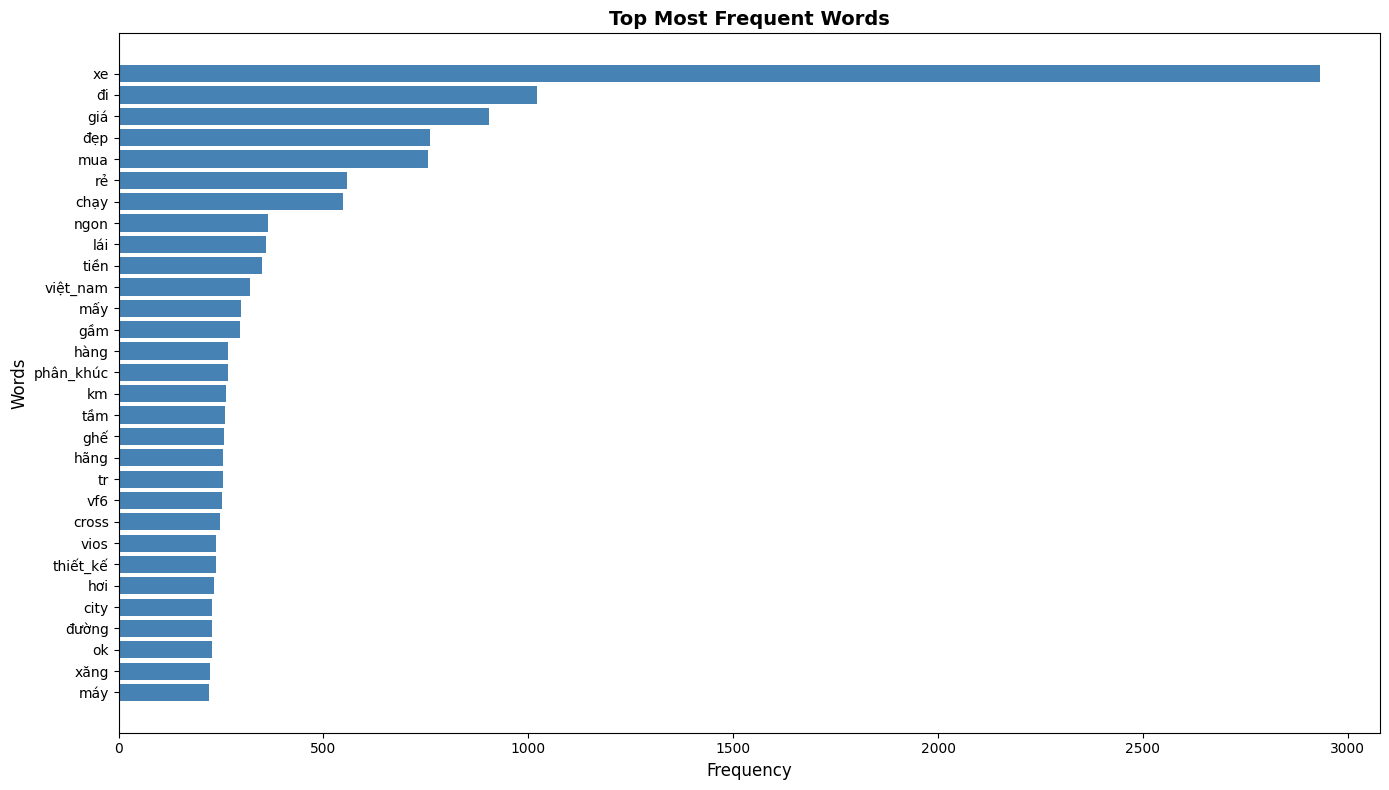

In [30]:
# Visualize top words
words, counts = zip(*top_words)

plt.figure(figsize=(14, 8))
plt.barh(range(len(words)), counts, color='steelblue')
plt.yticks(range(len(words)), words)
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('Words', fontsize=12)
plt.title('Top Most Frequent Words', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()